In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED=0

np.random.seed(SEED)

# Data

Generate two separable normal distributed datasets in 2D.

In [17]:
def generate_dataset(n=200) -> np.ndarray:
    """Generate the linearly separable dataset.
    
    Two classes represented by normal non-overlapping normal distributions.
    
    Args:
        n (int): The number of datapoints this dataset should contain. Rounded to the nearest even number.
    """
    # covariance matrix which ensures that the dataset is separable
    cov = np.array([[0.02, 0], [0, 1]])
    
    n = n // 2
    
    # white noise
    dataset_A = np.random.multivariate_normal([4, 0], cov, n)
    dataset_A = np.column_stack((dataset_A, np.ones(n)))
    
    dataset_B = np.random.multivariate_normal([5, 1], cov, n)
    dataset_B = np.column_stack((dataset_B, -np.ones(n)))
    
    dataset = np.vstack((dataset_A, dataset_B))
    np.random.shuffle(dataset)
    
    return dataset

def plot_data(X, y, w=None):
    """Plot the dataset and the decision boundary.
    
    Args:
        X (np.ndarray): The 2D points to plot.
        y (np.ndarray): The labels of the 2D points (used as colors).
        w (np.ndarray, optional): The weights of the perceptron.
    """
    # Points
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    # Line
    if w is not None:
        bias = w[0]
        c = -bias / w[2]
        m = - w[1] / w[2]
        line_x = np.linspace(-10, 10, 2)
        line_y = line_x * m + c

        plt.plot(line_x, line_y, '--k')
        
    plt.xlim([3, 6])
    plt.ylim([-4, 4])
    plt.show()
    

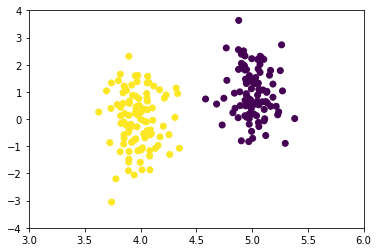

In [18]:
dataset = generate_dataset(n=200)

X, y = dataset[:, :2], dataset[:, 2]

plot_data(X, y)

# Perceptron

In [19]:
class Perceptron:
    """Encapsulates the perceptron model
    
    Parameters:
        n_weights: 
            The number of weights to use for the perceptron. 
            Note that n_weights + 1 will be used because of the bias term.
        max_iter: 
            Maximum number of iterations before the learning loop is stopped.
            
    Attributes:
        w: Weights of the perceptron.
    """
    
    def __init__(self, n_weights=2, max_iter=500):
        self.w = np.random.uniform(low=-1, high=1, size=n_weights+1)
        self.max_iter = max_iter
        
    def predict(self, X) -> float:
        """Predict the class for the given input"""
        # Add ones to the left of X for the bias terms
        X_bias = np.hstack((np.ones_like(X.shape[0]), X))
        y = np.dot(self.w, X_bias)
    
        return 1.0 if y > 0 else -1
    
    def fit(self, X, y):
        """Train the model on the given data"""
        
        iteration = 0
        while True:
            weights_updated = False
            
            for i, x in enumerate(X):
                y_hat = self.predict(x)
                if (y_hat * y[i] < 0):
                    # Wrongly classified instance,
                    # update the weights
                    self.w = self.w + y[i] * np.hstack((1, x))
                    weights_updated = True
                
            # Stopping criterion 1.
            if not weights_updated:
                print("Finished after {} iterations.".format(iteration))
                break
            
            # Stopping criterion 2.
            iteration += 1
            if iteration >= self.max_iter:
                print("Maximum iterations reached. Stopping...")
                break
            
        

In [20]:
model = Perceptron()

# Fit / Train the model
model.fit(X, y)

Finished after 12 iterations.


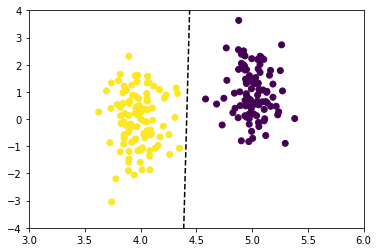

In [22]:
plot_data(X, y, model.w)